In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import sem

df_path = "Kaggle\Kaggle_data.csv"

In [3]:
df = pd.read_csv(df_path)
df.head()

,I am currently employed at least part-time,I identify as having a mental illness,Education,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am legally disabled,I have my regular access to the internet,I live with my parents,I have a gap in my resume,...,Obsessive thinking,Mood swings,Panic attacks,Compulsive behavior,Tiredness,Age,Gender,Household Income,Region,Device Type
0,0,0,High School or GED,0,0,0.0,0,1,0,1,...,1.0,0.0,1.0,0.0,0.0,30-44,Male,"$25,000-$49,999",Mountain,Android Phone / Tablet
1,1,1,Some Phd,1,0,0.0,0,1,0,0,...,0.0,0.0,1.0,0.0,1.0,18-29,Male,"$50,000-$74,999",East South Central,MacOS Desktop / Laptop
2,1,0,Completed Undergraduate,1,0,0.0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,30-44,Male,"$150,000-$174,999",Pacific,MacOS Desktop / Laptop
3,0,0,Some Undergraduate,1,0,NaN,0,1,1,1,...,0.0,0.0,0.0,0.0,0.0,30-44,Male,"$25,000-$49,999",New England,Windows Desktop / Laptop
4,1,1,Completed Undergraduate,1,1,35.0,1,1,0,1,...,1.0,1.0,1.0,1.0,1.0,30-44,Male,"$25,000-$49,999",East North Central,iOS Phone / Tablet


In [4]:
df.columns

Index(['I am currently employed at least part-time',
       'I identify as having a mental illness', 'Education',
       'I have my own computer separate from a smart phone',
       'I have been hospitalized before for my mental illness',
       'How many days were you hospitalized for your mental illness',
       'I am legally disabled', 'I have my regular access to the internet',
       'I live with my parents', 'I have a gap in my resume',
       'Total length of any gaps in my resume in�months.',
       'Annual income (including any social welfare programs) in USD',
       'I am unemployed', 'I read outside of work and school',
       'Annual income from social welfare programs', 'I receive food stamps',
       'I am on section 8 housing',
       'How many times were you hospitalized for your mental illness',
       'Lack of concentration', 'Anxiety', 'Depression', 'Obsessive thinking',
       'Mood swings', 'Panic attacks', 'Compulsive behavior', 'Tiredness',
       'Age', 'Gender

In [5]:
df["Mental_Health_Index"] = df["Lack of concentration"] + df["Anxiety"] + df["Depression"] + df["Obsessive thinking"] + df["Mood swings"] + df["Panic attacks"] + df["Compulsive behavior"]

In [6]:
df["Unemployed"] = df["I am unemployed"]
df["Mental_Illness"] = df["I identify as having a mental illness"]

In [7]:
df_clean = df[["Unemployed", "Mental_Illness", "Mental_Health_Index", "Region"]]
df_clean.describe()

,Unemployed,Mental_Illness,Mental_Health_Index
count,334.000000,334.000000,333.00000
mean,0.257485,0.239521,1.18018
std,0.437905,0.427431,1.85400
min,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.00000
50%,0.000000,0.000000,0.00000
75%,1.000000,0.000000,2.00000
max,1.000000,1.000000,7.00000


In [8]:
region_group = df_clean.groupby(by = ["Region"])


unemp = region_group["Unemployed"].sum()
mhi = region_group["Mental_Health_Index"].mean()
mi = region_group["Mental_Illness"].sum()

region_sum = {
    "Unemployment Count": unemp,
    "MHI Average": mhi,
    "Mental Illness Count": mi
}

pd.DataFrame(region_sum)

,Unemployment Count,MHI Average,Mental Illness Count
Region,,,
East North Central,19,1.100000,10
East South Central,6,1.842105,8
Middle Atlantic,9,0.892857,14
Mountain,11,1.406250,10
New England,6,0.857143,5
Pacific,13,1.200000,12
South Atlantic,8,0.952381,8
West North Central,5,1.923077,3
West South Central,9,1.593750,10


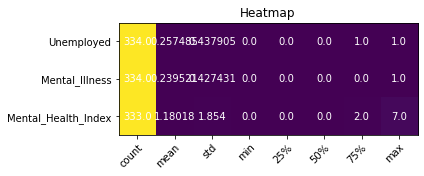

In [9]:
title = ["Unemployed","Mental_Illness","Mental_Health_Index"]
statistics = ["count", "mean", "std","min", "25%", "50%", "75%","max"]
points = np.array([[334.00, 0.257485, 0.437905, 0.00, 0.00, 0.00, 1.00,1.00],[334.00, 0.239521, 0.427431, 0.00, 0.00, 0.00, 0.00,1.00],[333.00, 1.18018, 1.85400, 0.00, 0.00, 0.00, 2.00,7.00]])
fig, ax = plt.subplots()
im = ax.imshow(points)
ax.set_xticks(np.arange(len(statistics)))
ax.set_yticks(np.arange(len(title)))
ax.set_xticklabels(statistics)
ax.set_yticklabels(title)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
for i in range(len(title)):
    for j in range(len(statistics)):
        text = ax.text(j, i, points[i, j],
                       ha="center", va="center", color="w")
ax.set_title("Heatmap")
fig.tight_layout()
plt.show()


In [10]:
data_crosstab = pd.crosstab(df['Unemployed'],
                            df['Mental_Illness'], 
                            margins = False)
print(data_crosstab)

Mental_Illness    0   1
Unemployed             
0               197  51
1                57  29


No handles with labels found to put in legend.
No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

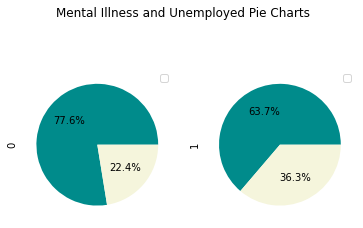

In [11]:
plt.figure(); data_crosstab.plot.pie(title='Mental Illness and Unemployed Pie Charts', colors=['darkcyan','beige'],autopct='%.1f%%', subplots=True, labels = ["", ""])
plt.savefig("MIvUnemp_pies.pdf")

In [ ]:
my_labels = {1:'Unemployed',0:'Employed'}
my_colors = ['lightblue','lightsteelblue','silver']

# count the values to plot pie chart
s = df.sentiment.map(my_labels).value_counts()

plt.pie(s, labels=s.index, autopct='%1.1f%%', colors=my_colors)
# also
# s.plot.pie(autopct='%1.1f%%', colors=my_colors)

plt.show()

In [11]:
from scipy.stats import fisher_exact
oddsr, p = fisher_exact(data_crosstab, alternative='two-sided')
print(f"{oddsr} , p = {p}")

1.9652562779497764 , p = 0.018596040841831637


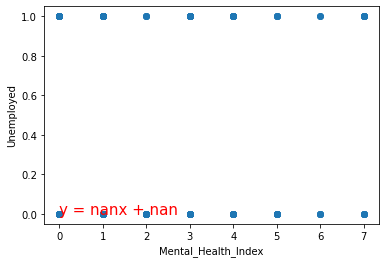

In [12]:
x=df["Mental_Health_Index"].astype(float)
y=df["Unemployed"].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(0,0),fontsize=15,color="red")
plt.xlabel("Mental_Health_Index")
plt.ylabel("Unemployed")
plt.show()

In [13]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
venn2([set('Mental_Health_Index'),set('Unemployed')],set_labels = ('Mental_Health_Index', 'Unemployed'))
plt.show()

ModuleNotFoundError: No module named 'matplotlib_venn'

{'whiskers': [<matplotlib.lines.Line2D at 0x27419ee9e50>,
 'caps': [<matplotlib.lines.Line2D at 0x27419ef7550>,
 'boxes': [<matplotlib.lines.Line2D at 0x27419ee9af0>,
 'medians': [<matplotlib.lines.Line2D at 0x27419ef7c10>,
 'fliers': [<matplotlib.lines.Line2D at 0x27419ef7f70>,
 'means': []}

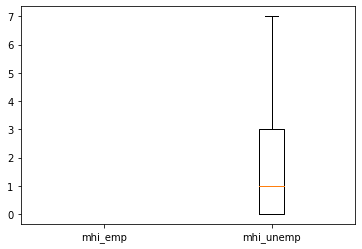

In [ ]:
#from matplotlib_venn import venn2
mhi_emp = df.loc[df["Unemployed"] == 0]["Mental_Health_Index"]

mhi_unemp = df.loc[df["Unemployed"] == 1]["Mental_Health_Index"]
data = [mhi_emp, mhi_unemp]

plt.boxplot(data, labels=["mhi_emp", "mhi_unemp"])


In [ ]:
print(mhi_emp.max())
print(mhi_emp.mean())
print(mhi_emp.median())
quartiles = mhi_emp.quantile([.25,.5,.75])
print(quartiles)

7.0
0.9635627530364372
0.0
0.25    0.0
0.50    0.0
0.75    1.0
Name: Mental_Health_Index, dtype: float64


In [ ]:
print(mhi_unemp.max())
print(mhi_unemp.mean())
print(mhi_unemp.median())
quartiles = mhi_unemp.quantile([.25,.5,.75])
print(quartiles)

7.0
1.802325581395349
1.0
0.25    0.0
0.50    1.0
0.75    3.0
Name: Mental_Health_Index, dtype: float64


In [ ]:
from scipy.stats import chisquare
chisquare(mhi_unemp, mhi_emp)

ValueError: operands could not be broadcast together with shapes (86,) (248,) 

{'whiskers': [<matplotlib.lines.Line2D at 0x27419e98730>,
 'caps': [<matplotlib.lines.Line2D at 0x27419e9f160>,
 'boxes': [<matplotlib.lines.Line2D at 0x27419e98490>,
 'medians': [<matplotlib.lines.Line2D at 0x27419e9f340>,
 'fliers': [<matplotlib.lines.Line2D at 0x27419e9f9d0>,
 'means': []}

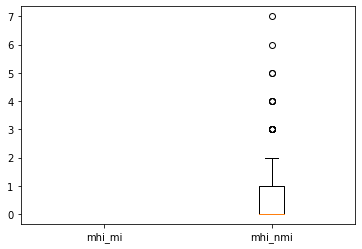

In [ ]:
#from matplotlib_venn import venn2
mhi_mi = df.loc[df["Mental_Illness"] == 1]["Mental_Health_Index"]

mhi_nmi = df.loc[df["Mental_Illness"] == 0]["Mental_Health_Index"]
data = [mhi_mi, mhi_nmi]

plt.boxplot(data, labels=["mhi_mi", "mhi_nmi"])

In [ ]:
print(mhi_mi.max())
print(mhi_mi.min())
print(mhi_mi.mean())
print(mhi_mi.median())
quartiles = mhi_mi.quantile([.25,.5,.75])
print(quartiles)

7.0
0.0
3.430379746835443
3.0
0.25    2.0
0.50    3.0
0.75    5.0
Name: Mental_Health_Index, dtype: float64


([<matplotlib.axis.XTick at 0x27419e53040>,
 [Text(1, 0, 'Employed'), Text(2, 0, 'Not Employed')])

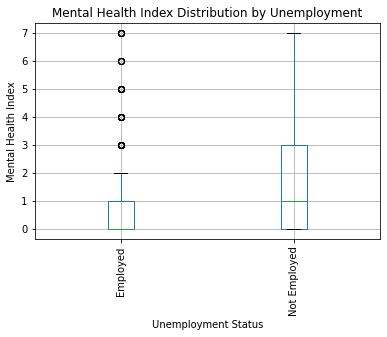

In [ ]:
df_mhi = df[["Mental_Health_Index", "Unemployed"]]
df_mhi.boxplot(by = "Unemployed")
plt.title("Mental Health Index Distribution by Unemployment")
plt.suptitle("")
plt.ylabel("Mental Health Index")
plt.xlabel("Unemployment Status")
plt.xticks([1,2], labels = ["Employed", "Not Employed"], rotation = 90)

([<matplotlib.axis.XTick at 0x2741ad121c0>,
 [Text(1, 0, 'Not Diagnosed'), Text(2, 0, 'Diagnosed')])

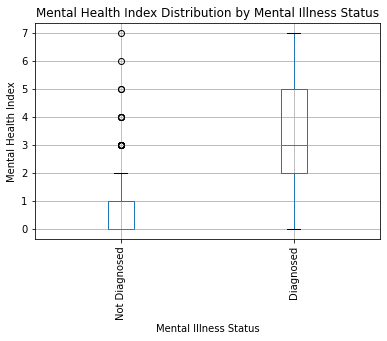

In [ ]:
df_mhi = df[["Mental_Health_Index", "Mental_Illness"]]
df_mhi.boxplot(by = "Mental_Illness")

plt.title("Mental Health Index Distribution by Mental Illness Status")
plt.suptitle("")
plt.ylabel("Mental Health Index")
plt.xlabel("Mental Illness Status")
plt.xticks([1,2], labels = ["Not Diagnosed", "Diagnosed"], rotation = 90)